# Variables

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
tf.__version__

'0.12.0-rc0'

In [18]:
np.__version__

'1.11.2'

In [4]:
__author__ = 'kyubyong. kbpark.linguist@gmail.com. https://www.github.com/kyubyong'

## Variables 

Q0. Create a variable `w` with an initial value of 1.0 and name `weight`.
Then, print out the value of `w`.

1.0


Q1. Complete this code.

In [51]:
# Create a variable w.
w = tf.Variable(1.0, name="Weight")

# Q. Add 1 to w and assign the value to w.
assign_op = ...

with tf.Session() as sess:
    sess.run(w.initializer)
    for _ in range(10):
        print w.eval(), "=>", 
        sess.run(assign_op)
        


1.0 => 2.0 => 3.0 => 4.0 => 5.0 => 6.0 => 7.0 => 8.0 => 9.0 => 10.0 =>


Q2. Complete this code.

In [3]:
w1 = tf.Variable(1.0)
w2 = tf.Variable(2.0)
w3 = tf.Variable(3.0)

out = w1 + w2 + w3

# Q. Add an Op to initialize global variables.
init_op = ...

with tf.Session() as sess:
    sess.run(init_op) # Initialize all variables.
    print out.eval()


6.0


Q3-4. Complete this code.

In [53]:
v = tf.Variable(tf.truncated_normal([1, 10]))
# Q3. Initialize `w` with 2 * v
w = ...

# Q4. Add an Op to initialize global variables.
init_op = ...
with tf.Session() as sess:
    sess.run(init_op) # Initialize all variables.
    _v, _w = sess.run([v, w])
    print _v
    print _w
    assert np.array_equiv(_v * 2.0, _w)

# Compare the value of `w` with z = 2 * v. 

[[  7.99060106e-01  -9.24833000e-01  -1.03938863e-01  -6.08309289e-04
   -1.10895765e+00   2.27522463e-01  -8.06696177e-01   3.09480548e-01
   -2.91035861e-01   2.44009346e-01]]
[[  1.59812021e+00  -1.84966600e+00  -2.07877725e-01  -1.21661858e-03
   -2.21791530e+00   4.55044925e-01  -1.61339235e+00   6.18961096e-01
   -5.82071722e-01   4.88018692e-01]]


Q5-8. Complete this code.

In [55]:
g = tf.Graph()
with g.as_default():
    w = tf.Variable([5,], name="Weight", dtype=tf.float32)
    # Q5. Print the name of `w`.
    print "Q5.", ...
    # Q6. Print the data type of `w`.
    print "Q6.", ...
    # Q7. Print the shape of `w`.
    print "Q7.", ...
    # Q8. Check if the graph of `w` is the same as `g`.
    print "Q8.", ...


Q5. Weight:0
Q6. <dtype: 'float32_ref'>
Q7. (1,)
Q8. True


## Variable helper functions 

Q9-13. Complete this code.

In [68]:
tf.reset_default_graph()

w1 = tf.Variable(1.0, name="Weight1")
w2 = tf.Variable(2.0, name="Weight2", trainable=False)
w3 = tf.Variable(3.0, name="Weight3")

# Q9. Add an op to list the names of uninitialized variables.
op1 = ...

# Q10. Check if `w1` has been initialized.
is_initialized = ...

with tf.Session() as sess:
    # Q11. Initialize the variables w1 and w2.
    sess.run(...)
    
    # Q12. Print the name of all global variables 
    for v in ...:
        print "global variable =>", v.name
    
    # Q13. Print the name of all trainable variables
    for v in ...:
        print "trainable_variable =>", v.name
    
    print "Has w1 been initialized?", is_initialized.eval()
    print sess.run(op1), "has not been initialized."
        


global variable => Weight1:0
global variable => Weight2:0
global variable => Weight3:0
trainable_variable => Weight1:0
trainable_variable => Weight3:0
Has w1 been initialized? True
['Weight3'] has not been initialized.


## Saving and Restoring Variables 

Q14-15. This is a simple example code to find the coefficient of a linear function. (Here y = 2x).
Complete the code.

In [105]:
tf.reset_default_graph()
w = tf.Variable(0.2, 'weight') # <- This is what we want to find. The true value is 2.
x = tf.random_uniform([1])
y = 2 * x # Let's pretend we don't know the coefficient 2 here.
y_hat = w * x
loss = tf.squared_difference(y, y_hat)
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    saver = tf.train.Saver()
    for step in range(1, 10001):
        sess.run(train_op)
        
        import os
        if not os.path.exists('model'): os.mkdir('model') # Let's make a folder in order not to discrupt our current folder.
            
        if step % 1000 == 0:
            print w.eval(), "=>", 
            
            # Q14. Save the checkpoint file, giving it a base name of `model/my-model`
            save_path = ...
    
    # Q15. Find the filename of the latest saved checkpoint file.
    # And if it exists, restore it.
    ...
    
    


1.06645 => 1.52099 => 1.76103 => 1.87487 => 1.93405 => 1.96603 => 1.98247 => 1.99091 => 1.9954 => 1.99765 =>


## Sharing Variables 

Q16. Complete this code.

In [87]:
g = tf.Graph()
with g.as_default():
    with tf.variable_scope("foo"):
        v = tf.get_variable("v", [1,])  # v.name == "foo/v:0"
        
    #Q. Get the existing variable `v`
    ...

assert v1 == v    

Q17. Predict the result of this code.

In [4]:
with tf.variable_scope("foo"):
    with tf.variable_scope("bar"):
        v = tf.get_variable("v", [1])
        # print "v.name =", v.name

Q18. Complete this code.

In [101]:
value = [0, 1, 2, 3, 4, 5, 6, 7]
# Q. Create an initializer with `value`.
init = ...

tf.reset_default_graph()
x = tf.get_variable('x', shape=[2, 4], initializer=init)

with tf.Session():
    x.initializer.run()
    print "x =\n", x.eval()


x =
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]]


Q19. Complete this code.

In [153]:
# Q. Create an initializer with a normal distribution of mean equals 0 and standard deviation equals 2.
init = ...

tf.reset_default_graph()
x = tf.get_variable('x', shape=[10, 1000], initializer=init)

with tf.Session():
    x.initializer.run()
    _x = x.eval()
    print "Make sure the mean", np.mean(_x), "is close to 0" 
    print "Make sure the standard deviation", np.std(_x), "is close to 2" 
    


Make sure the mean 0.030713 is close to 0
Make sure the standard deviation 1.98601 is close to 2


Q20. Complete this code.

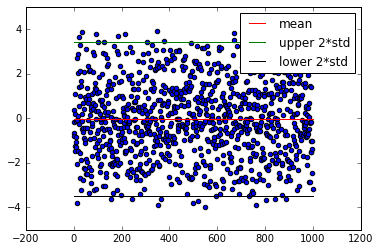

In [148]:
# Q. Create an initializer with a truncated normal distribution of mean equals 0 and standard deviation equals 2.
init = ...

tf.reset_default_graph()
x = tf.get_variable('x', shape=[1000,], initializer=init)

with tf.Session():
    x.initializer.run()
    _x = x.eval()
    plt.scatter(np.arange(1000), _x)
    _avg = np.array([np.mean(_x)] * 1000)
    _std = np.array([np.std(_x)] * 1000)
    plt.plot(np.arange(1000), _avg, 'r-')
    plt.plot(np.arange(1000), _avg + 2*_std, 'g-')
    plt.plot(np.arange(1000), _avg - 2*_std, 'k-')
    plt.legend(['mean', 'upper 2*std', 'lower 2*std'])
    plt.show()
# Note that few data points exceed the bounaries.


Q21. Complete this code.

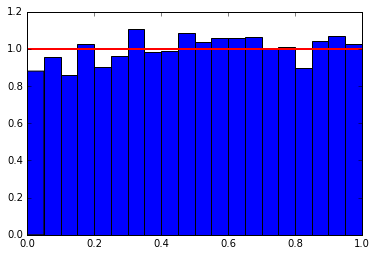

In [150]:
# Q. Create an initializer with a random normal distribution of minimum 0 and maximum 1.
init = ...

tf.reset_default_graph()
x = tf.get_variable('x', shape=[5000,], initializer=init)

with tf.Session():
    x.initializer.run()
    _x = x.eval()
    count, bins, ignored = plt.hist(_x, 20, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
# Note that few data points exceed the bounaries.


In [155]:
# Check other initializers such as zeros_initializer, ones_initializer, or orthogonal_initializer, as well.

## Exporting and Importing Meta Graphs

Q22. Complete the code. Make sure you've done questions 14-15.

In [111]:
tf.reset_default_graph()
print "Of course, there're no variables since we reset the graph. See", tf.global_variables()
with tf.Session() as sess:
    # Q. Import the saved graph of `model/my-model-10000`.
    new_saver = ...
    
    new_saver.restore(sess, 'model/my-model-10000')
    
    for v in tf.global_variables():
        print "Now we have a variable", v.name


Of course, there're no variables since we reset the graph. See []
Now we have a variable Variable:0
